In [1]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

numb = 5
# Read the crime data summary file
crs_path = "datasource/crime_sum.csv"
sum_df = pd.read_csv(crs_path)
print(sum_df.head())

# Read the crime data detail
cr_path = "datasource/crime_out.csv"
det_df = pd.read_csv(cr_path)
print(det_df.head())

# Read the Salary data
sal_path = "datasource/salary_out.csv"
sal_df = pd.read_csv(sal_path)
sal_df.head()

    jurisdiction  crime_per_pop
0          MAINE       0.118875
1        VERMONT       0.125750
2  NEW HAMPSHIRE       0.174875
3   NORTH DAKOTA       0.192875
4           UTAH       0.226625
  jurisdiction  year  state_population  violent_crime_total  crime_per_pop
0      ALABAMA  2001         4468912.0              19582.0          0.438
1       ALASKA  2001          633630.0               3735.0          0.589
2      ARIZONA  2001         5306966.0              28675.0          0.540
3     ARKANSAS  2001         2694698.0              12190.0          0.452
4   CALIFORNIA  2001        34600463.0             212867.0          0.615


,state,year,salary
0,United States,2016,60309
1,United States,2015,58476
2,United States,2014,55613
3,United States,2013,56479
4,United States,2012,54569


In [2]:
# Function to plot the graph
#def plot_line (x_axis, y_axis, crime_per_pop, def_color):
#    plt.plot(x_axis, y_axis, color=def_color)
#    plt.plot(x_axis, crime_per_pop, color="red")
#    plt.grid(True)
#    plt.show()
#    return

def plot_line2 (state, x_axis, y_axis, crime_per_pop, def_color):
    fig, ax1 = plt.subplots()
    ax1.plot(x_axis, y_axis, color=def_color)
    ax1.set_xlabel("Year")
    ax1.set_ylabel("Salary in $")
    ax1.legend('$', loc='upper left', frameon=False)
    #ax1.legend('Median Salary', frameon=False, ncol=2)
    
    ax2 = ax1.twinx()
    
    ax2.plot(x_axis,crime_per_pop, color="red")
    ax2.set_ylabel("Crime_per_Pop %")
    ax2.legend("C", loc='upper right', frameon=False)
    #plt.legend(["y_axis", "crime_per_pop"])
    plt.title(state)
    plt.show()
    return

Top 5 Lowest Crime Data
-----------------


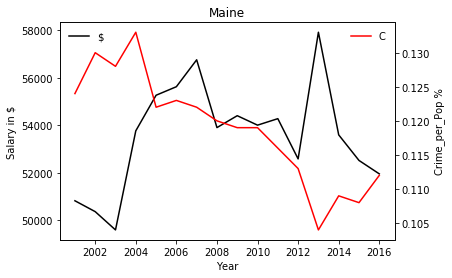

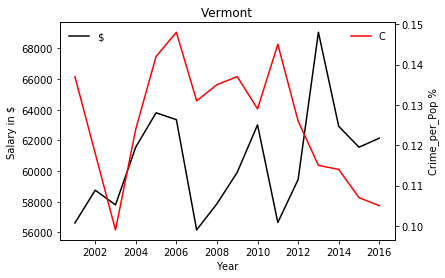

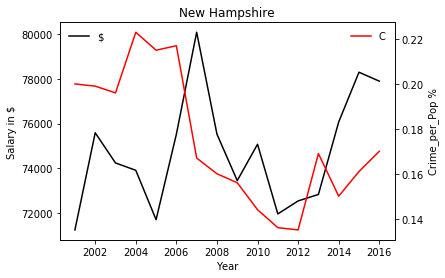

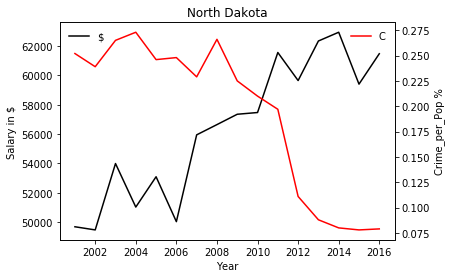

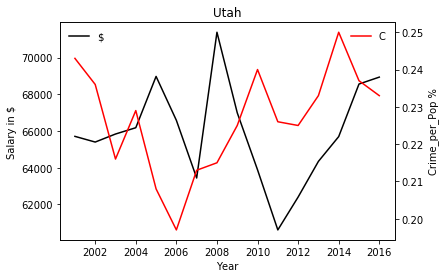

Top 5 Highest Crime Data
------------------------------


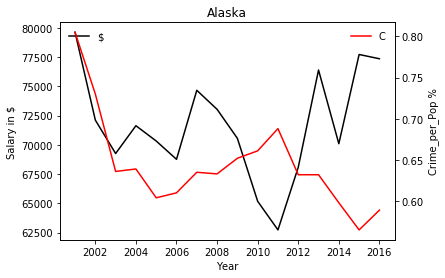

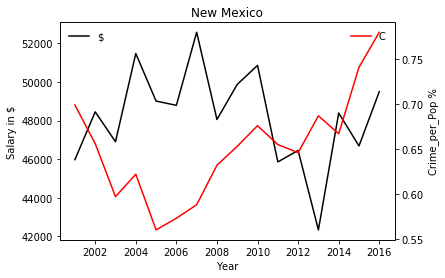

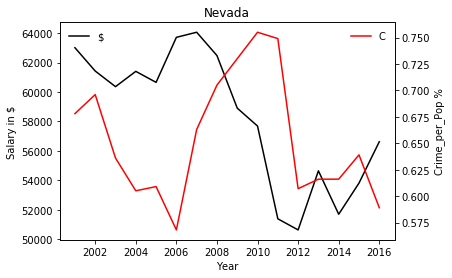

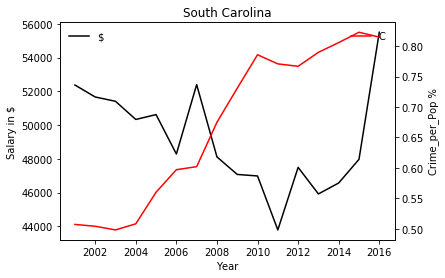

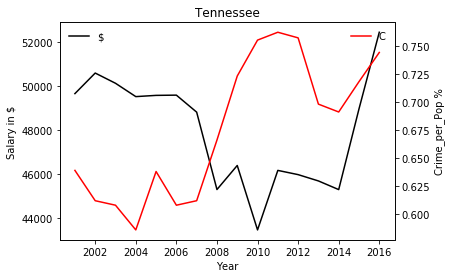

In [3]:
# plot_line(sal_df["year"], sal_df["crime_per_pop"], "")
state = sum_df["jurisdiction"].head(numb)
print(f'Top {numb} Lowest Crime Data')
print("-----------------")
for each_state in state:
    state_name = each_state.title()
  
    s_df = sal_df.loc[sal_df["state"] == state_name,:]
    s2_df = s_df.set_index("year")
      
    c_df = det_df.loc[det_df["jurisdiction"] == each_state,:]
    c2_df = c_df.set_index("year")
    
    #print(f'g2_df index {s2_df.index}')
    #print(f'g2_df salary {s2_df["salary"]}')
    #print(f'c2_df crime per pop {c2_df["crime_per_pop"]}')
    plot_line2(state_name, s2_df.index, s2_df["salary"], c2_df["crime_per_pop"], "black")
    
state = sum_df["jurisdiction"].tail(numb)
print(f'Top {numb} Highest Crime Data')
print("------------------------------")
for each_state in state:
    state_name = each_state.title()
  
    s_df = sal_df.loc[sal_df["state"] == state_name,:]
    s2_df = s_df.set_index("year")
      
    c_df = det_df.loc[det_df["jurisdiction"] == each_state,:]
    c2_df = c_df.set_index("year")
    
    #print(f'g2_df index {s2_df.index}')
    #print(f'g2_df salary {s2_df["salary"]}')
    #print(f'c2_df crime per pop {c2_df["crime_per_pop"]}')
    plot_line2(state_name, s2_df.index, s2_df["salary"], c2_df["crime_per_pop"], "black")


In [4]:
#g2_df.info()

In [5]:
#plt.plot(year, sal, color="black")
#plt.plot(g2_df.index, g2_df["salary"], color="black")
#plt.show()